# Projeto - Machine Learning I

## Exploração do dataset

Link pro dataset: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/input 

In [2]:
# Import das principais bibliotecas para explora o dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Dataset a partir do link raw, hospedado no github (evita a necessidade de ter o dataset na máquina).
music = pd.read_csv("https://raw.githubusercontent.com/fernandobrancher/project_machine_learning_i/main/music.csv")
music.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


#### Algumas informações sobre o dataset:

- 19 colunas
    - 1 coluna id (dropar no modelo)
    - 4 colunas de strings com informações da música: artista e nome


- 170 mil músicas

- Principais diferenças com o outro dataset
    - O dataset1 tem o genêro e album enquanto este não tem
    - Este dataset tem o ano e data de lançamento, enquanto o outro dataset não tem estas informações

#### Analise dds dados dataset

In [6]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [8]:
# Dataset sem valores nulos
music.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

As colunas numéricas são apresentadas em grandezas diferentes ao longo das colunas (principalmente duração, tempo e popularidade).

In [9]:
music.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


Baseado na análise acima, podemos remover as seguintes colunas:
- artista, nome e id da música: não serão utilizados no modelo
- release_date: traz a mesma informação que a coluna "year"

In [30]:
music.drop(columns=["artists", "name", "id", "release_date"], inplace=True)
music.head(3)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913,3,0.101,-14.850,1,5,0.0339,110.339


#### Correlação entre as features

No mapa de calor abaixo são apresentadas as correlações entre as variáveis.

Focando na relação das demais features com o nosso target (populaidade), é possíel notar que as que apresentam maior destaque são:
- year
- acoustiness
- energy
- loudness

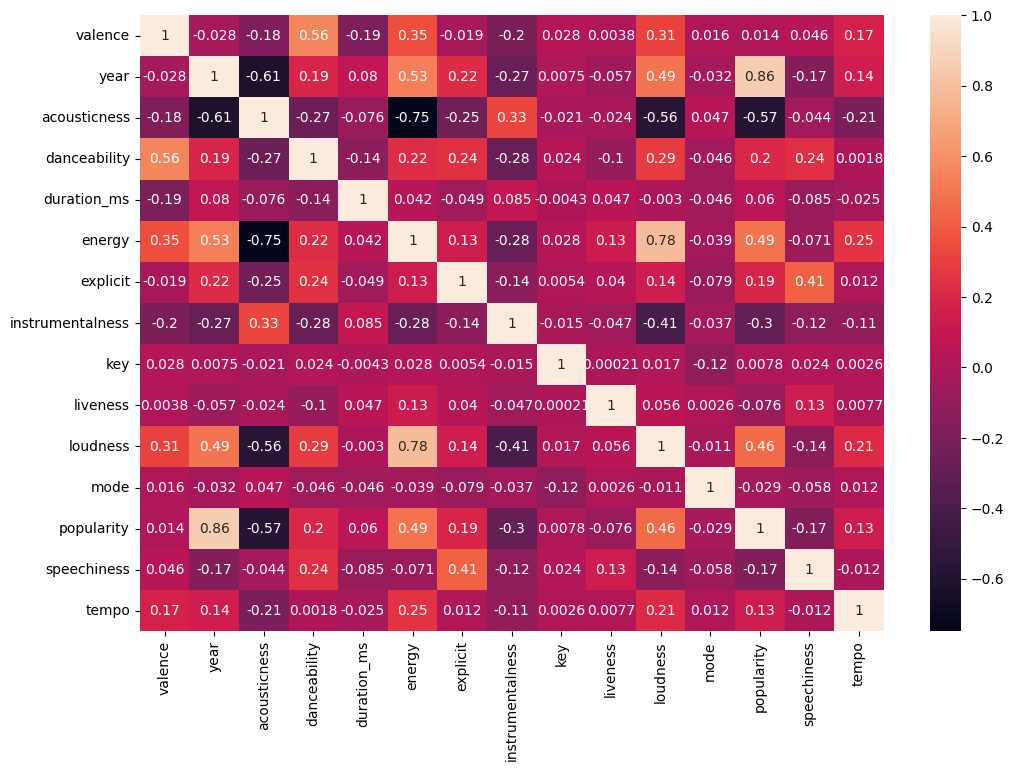

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(music.corr(numeric_only=True), annot=True);

Todos os registros são únicos neste dataset, não há duplicatas.

In [18]:
music.duplicated(subset = 'id').value_counts()

False    170653
Name: count, dtype: int64

Top 10 músicas, em popularidade, que estão no dataset.

In [12]:
music[['artists', 'name', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

,artists,name,popularity
19611,"['Bad Bunny', 'Jhay Cortez']",Dakiti,100
19606,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),99
19618,['BTS'],Dynamite,97
19608,"['Cardi B', 'Megan Thee Stallion']",WAP (feat. Megan Thee Stallion),96
19610,['Ariana Grande'],positions,96
19612,['Pop Smoke'],What You Know Bout Love,96
19616,['The Weeknd'],Blinding Lights,96
19607,"['Pop Smoke', 'Lil Baby', 'DaBaby']",For The Night (feat. Lil Baby & DaBaby),95
19615,"['Justin Bieber', 'Chance the Rapper']",Holy (feat. Chance The Rapper),95
19620,"['Justin Bieber', 'benny blanco']",Lonely (with benny blanco),95


#### Análise da distribuição das categorias.

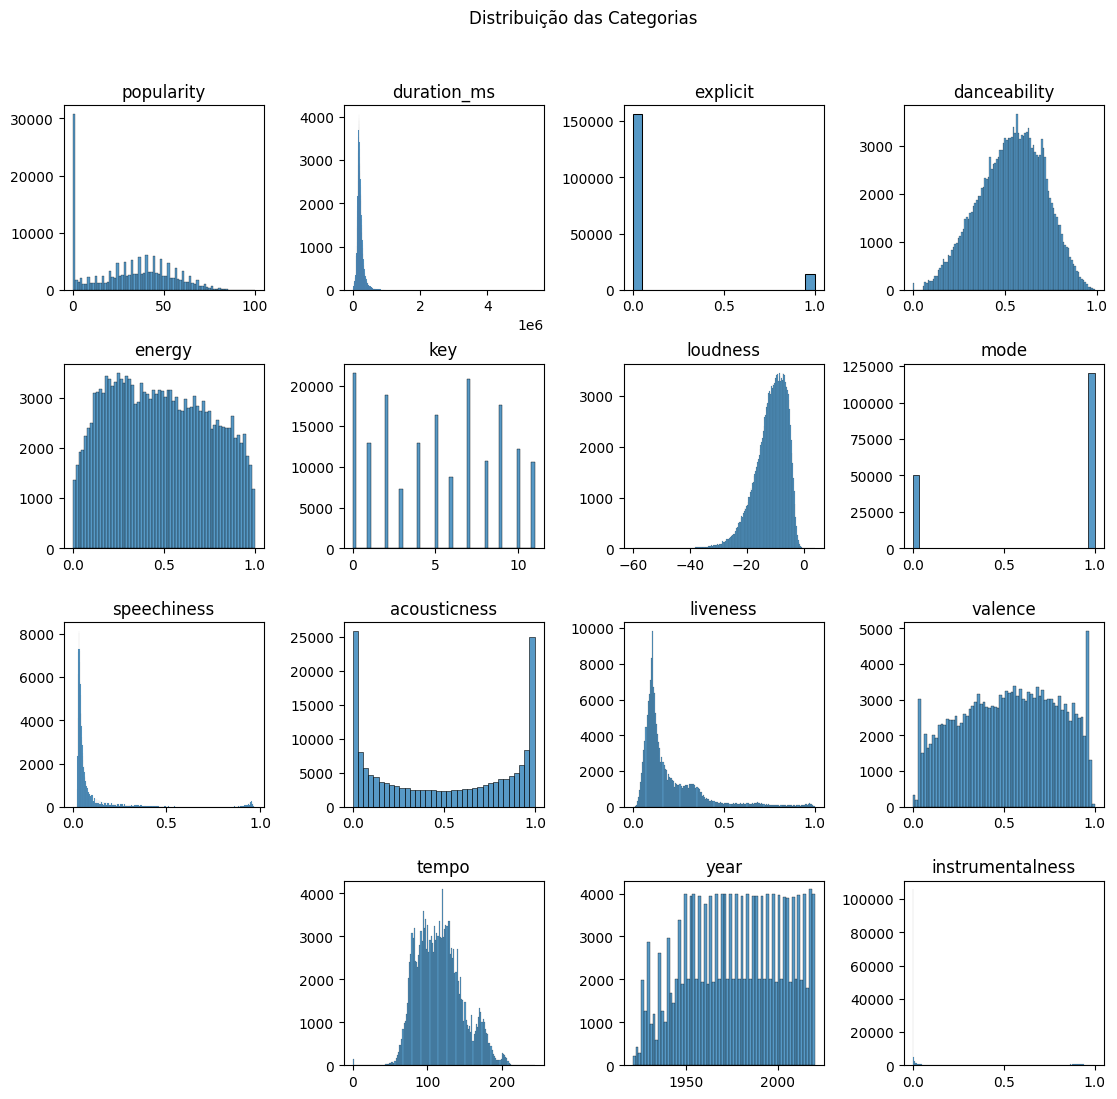

In [56]:
categories = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key',
              'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence',
              'tempo', "year", 'instrumentalness']


fig = plt.figure(figsize=(13,12))

for number, category in enumerate(categories, start=1):
    if number <= 12:
        ax = fig.add_subplot(4,4,number)
        sns.histplot(data=music, x=category)
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')
        
    else:
        ax = fig.add_subplot(4,4,number+1)
        sns.histplot(data=music, x=category)
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Distribuição das Categorias')
plt.show()

In [61]:
music.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


##### Popularidade 0

Percebi um número bastante expressivo de músicas com popularidade 0. 

Decidi explorar um pouco para ver se trazia alguns insights, segue abaixo um resumo do que percebi:

In [34]:
popularity_0 = music[music["popularity"] == 0]

In [36]:
# Porcentagem de musicas com popularidade 0.
perc = popularity_0.shape[0]/music.shape[0] * 100
perc

16.344277569102214

In [35]:
popularity_0.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,27892.000000,27892.000000,27892.000000,27892.000000,2.789200e+04,27892.000000,27892.000000,27892.000000,27892.000000,27892.000000,27892.000000,27892.000000,27892.0,27892.000000,27892.000000
mean,0.510988,1942.600065,0.850163,0.503406,2.144083e+05,0.271674,0.088054,0.347839,5.200416,0.223285,-15.172543,0.695791,0.0,0.192032,108.701879
std,0.267299,14.178548,0.263625,0.179986,1.569471e+05,0.181303,0.283378,0.391124,3.505614,0.163995,5.677334,0.460080,0.0,0.291706,31.061990
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.0,0.000000,0.000000
25%,0.293000,1934.000000,0.866750,0.366000,1.488595e+05,0.142000,0.000000,0.000034,2.000000,0.111000,-18.728000,0.000000,0.0,0.041500,82.704000
50%,0.535000,1942.000000,0.974000,0.506000,1.849730e+05,0.234000,0.000000,0.085050,5.000000,0.158000,-14.746500,1.000000,0.0,0.056600,106.849500
75%,0.730000,1949.000000,0.992000,0.654000,2.138130e+05,0.358000,0.000000,0.820000,8.000000,0.293000,-10.968000,1.000000,0.0,0.136000,127.956000
max,1.000000,2020.000000,0.996000,0.983000,3.569933e+06,1.000000,1.000000,0.999000,11.000000,0.988000,3.855000,1.000000,0.0,0.970000,221.741000


Após plotar as distribuições do dataset popularity_0, muito se permaneceu na mesma tendência. Entretanto, visualmente, o que apresentou uma mudança mais destacada foram as features realtivas ao ano e energia, como é possível ver abaixo. Acredito que isso reforça, junto à tabela de correlação, que estas features são bastante decisivas, já que ao filtrar as musicas de popularidade nula, a distribuição se concetra em baixos valores para energia e um período mais antigo para o ano.

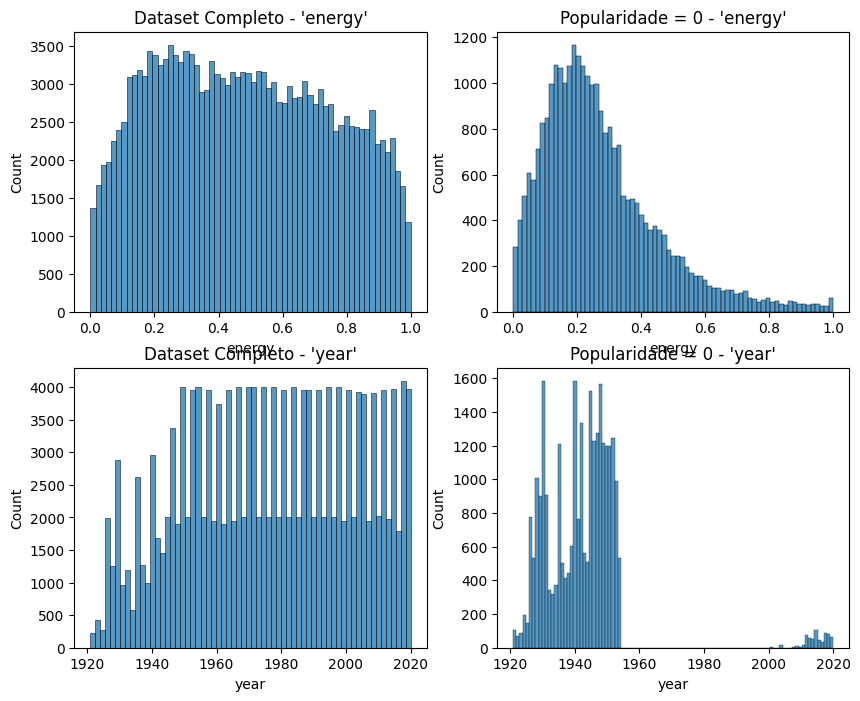

In [64]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(2,2,1)
sns.histplot(data=music, x="energy")
plt.title("Dataset Completo - 'energy'")

ax = fig.add_subplot(2,2,2)
sns.histplot(data=popularity_0, x="energy")
plt.title("Popularidade = 0 - 'energy'")

ax = fig.add_subplot(2,2,3)
sns.histplot(data=music, x="year")
plt.title("Dataset Completo - 'year'")

ax = fig.add_subplot(2,2,4)
sns.histplot(data=popularity_0, x="year")
plt.title("Popularidade = 0 - 'year'")

#plt.suptitle('Distribuição da categoria "energy" em ambos datasets.')
plt.show()

**Comentário:** Abaixo explorei a relação entre o ano e a popularidade, pois pelo quarto gráfico acima achei que talvez as músicas antigas poderiam não ter sido classificadas com popularidade, já que tinha muitas com valor 0. Mas abaixo é possível ver que isso não se confirma. 

Achei interessante deixar mesmo assim o gráfico, pois nele fica claro que conforme os anos vão avançando as valores de popularidade também vão aumentando. Apenas 2020 que tem varios valores distintos para a popularidade. 

Mas algo que me passou na cabeça foi: como foi feita a seleção de musicas para o dataset? Será que foi aleatório, estratificado ou por algum filtro? Digo isso porque achei curioso que desde a década de 80 até os anos 2000, não parece ter nenhuma música com popularidade inferior a uns 15 pontos. Particularmente acho pouco provável, o que faz pensar que a seleção das músicas não foi tão aleatória. O que acham? 

<Axes: xlabel='year', ylabel='popularity'>

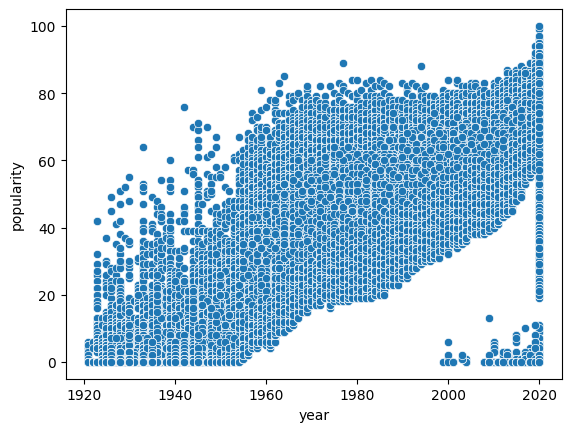

In [48]:
sns.scatterplot(y=music["popularity"], x=music["year"])

Pelo que 

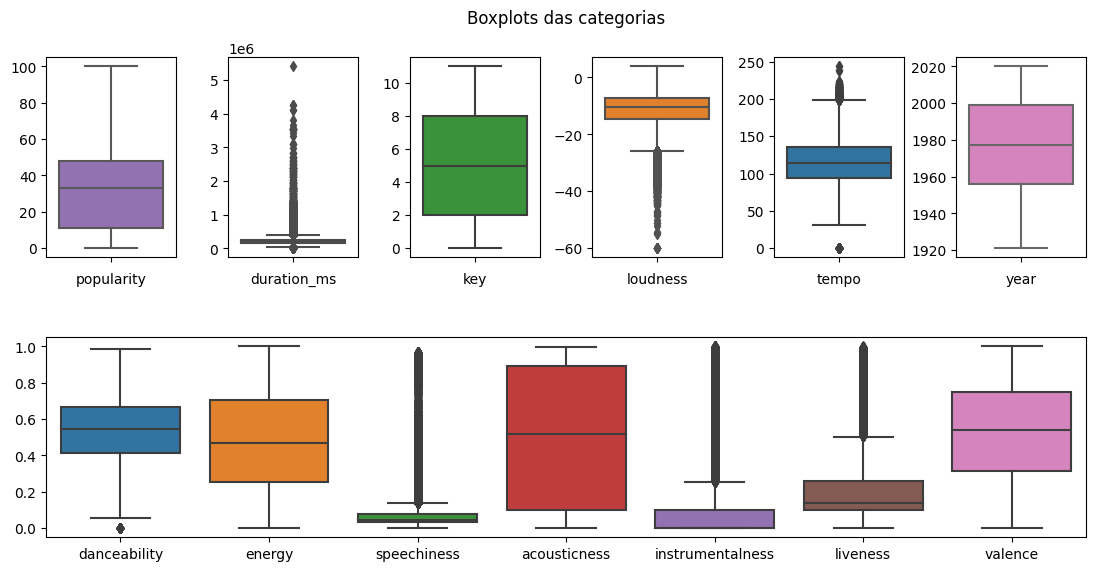

In [53]:
tech_categories = music[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
categories = ['popularity', 'duration_ms', 'key', 'loudness', 'tempo', 'year']
colors = {6:'tab:pink', 5:'tab:blue', 4:'tab:orange', 3:'tab:green', 2:'tab:red', 1:'tab:purple'}

fig= plt.figure(figsize=(13,6))

for number, category in enumerate(categories, start=1):
    ax = fig.add_subplot(2,6,number)
    sns.boxplot(data=music, y=category, color=colors[number])
    plt.xlabel(category)
    ax.set_ylabel('')
    
fig.add_subplot(2,1,2)
sns.boxplot(data=tech_categories)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Boxplots das categorias')
plt.show()

## Machine Learning

Copiei e colei aqui o que o DIego Dio mandou no grupo

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import matplotlib.pyplot as plt

In [12]:
music = pd.read_csv("https://raw.githubusercontent.com/fernandobrancher/project_machine_learning_i/main/music.csv")

In [13]:
music_dropped = music.drop(["artists", "id", "name", "release_date", "duration_ms", "explicit"], axis=1)

#normalizando todas colunas
for column in music_dropped.columns:
    
    music_dropped[column] = music_dropped[column]/music_dropped[column].abs().max()

# for column in music_dropped.columns:
    
#     music_dropped[column + "_squared"] = music_dropped[column]**2
#     music_dropped[column + "_cubed"] = music_dropped[column]**3
#     music_dropped[column + "_quartic"] = music_dropped[column]**4
    
music_dropped.head()

,valence,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,0.95099,0.985944,0.282389,0.211,0.878000,0.909091,0.665,-0.334933,1.0,0.04,0.037732,0.332450
1,0.9630,0.95099,0.734940,0.828947,0.341,0.000000,0.636364,0.160,-0.207350,1.0,0.05,0.427835,0.250243
2,0.0394,0.95099,0.964859,0.331984,0.166,0.913000,0.272727,0.101,-0.247500,1.0,0.05,0.034948,0.453125
3,0.1650,0.95099,0.970884,0.278340,0.309,0.000028,0.454545,0.381,-0.155267,1.0,0.03,0.036495,0.411113
4,0.2530,0.95099,0.960843,0.423077,0.193,0.000002,0.272727,0.229,-0.168267,1.0,0.02,0.039175,0.417503


In [4]:
#linear
x = music_dropped.drop("popularity", axis=1)
y = music_dropped["popularity"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.80, random_state=42)

In [5]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

[None]

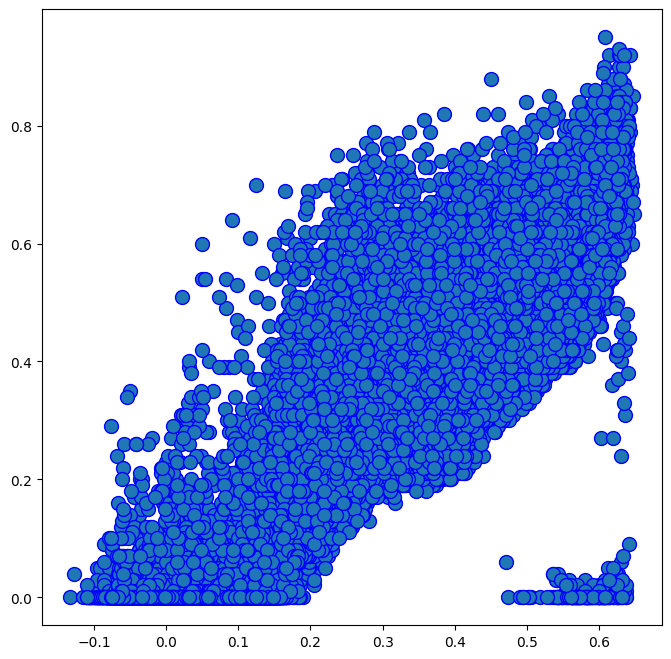

In [7]:
fig = plt.figure(figsize=(8, 8))

l = plt.plot(y_pred, y_test, "bo")
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor="C0")

In [8]:
print(
    f"R2: {r2_score(y_test, y_pred)}, \nMAE:{mean_absolute_error(y_test, y_pred)}, \nMSE:{mean_squared_error(y_test, y_pred)}"
)

R2: 0.7593190745045111, 
MAE:0.0797890051379497, 
MSE:0.011516997888397511


In [9]:
#quadrada
for column in music_dropped.columns:
    
    music_dropped[column + "_squared"] = music_dropped[column]**2
    
x = music_dropped.drop("popularity", axis=1)
y = music_dropped["popularity"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.80, random_state=42
)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

[None]

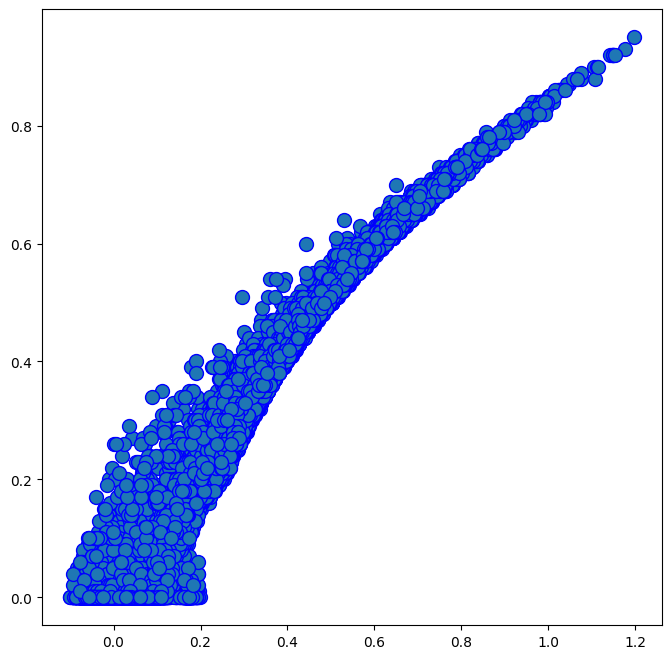

In [14]:
fig = plt.figure(figsize=(8, 8))

l = plt.plot(y_pred, y_test, "bo")
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor="C0")

In [15]:
print(
    f"R2: {r2_score(y_test, y_pred)}, \nMAE:{mean_absolute_error(y_test, y_pred)}, \nMSE:{mean_squared_error(y_test, y_pred)}"
)

R2: 0.9615296011244593, 
MAE:0.031852113003418066, 
MSE:0.0018408750161786986


In [16]:
#cubica
for column in music_dropped.columns:
    
#     music_dropped[column + "_squared"] = music_dropped[column]**2
    music_dropped[column + "_cubed"] = music_dropped[column]**3
    
x = music_dropped.drop("popularity", axis=1)
y = music_dropped["popularity"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.80, random_state=42
)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

[None]

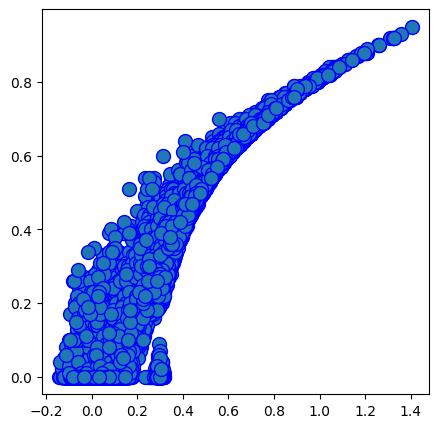

In [18]:
fig = plt.figure(figsize=(5, 5))

l = plt.plot(y_pred, y_test, "bo")
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor="C0")

In [19]:
print(
    f"R2: {r2_score(y_test, y_pred)}, \nMAE:{mean_absolute_error(y_test, y_pred)}, \nMSE:{mean_squared_error(y_test, y_pred)}"
)

R2: 0.9164818202021816, 
MAE:0.04722801947525829, 
MSE:0.00399648912099728


In [ ]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
music_model = music.drop(['artists', 'id', 'name', 'release_date'], axis=1)

music_model.head()

In [ ]:
X = music_model.drop('popularity', axis=1)
y = music['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lista_etapas = [
                ('std_scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
]

pipe_rf = Pipeline(lista_etapas).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [ ]:
y_pred_train = pipe_rf.predict(X_train)

c:\Users\Mayara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mayara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

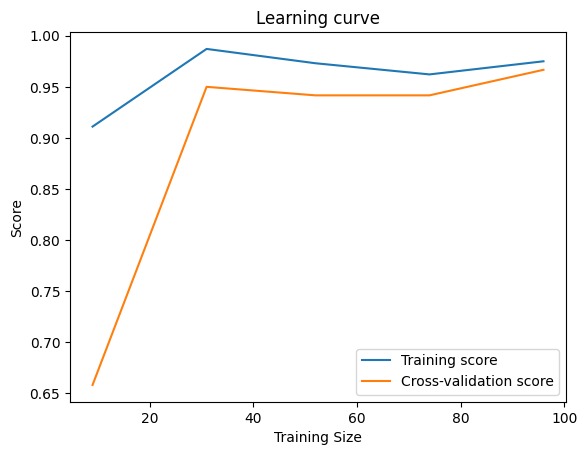

In [1]:
# modelo de learning curve passado pelo professor como sugestão
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5)

# Compute the mean of the scores
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()